---
---
---

# 🐧 The Exploratory Penguin Analysis 🐧

This Challenge is for Exploring and Understanding the **[Palmer Penguins Dataset](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data)** to Reinforce Your Current Skills in Data Analysis, Processing, and Visualization.

---
---

## 💠 **PART ONE**: Importations and Initializations 💠

As always, we want to start with importing and initializing relevant tools for getting started in the world of data analysis and exploration.

In [2]:
# Standard Data Manipulation/Visualization Toolkit
import numpy as np                # Numerical Operations
import pandas as pd               # DataFrame Tools
import matplotlib.pyplot as plt   # Basic Graphing Tool
import seaborn as sns             # Beautified MatPlotLib Visualizations
%matplotlib inline

# Data Preprocessing, Scaling, and Imputation Tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Global Visualization Parametrization
plt.rcParams["figure.figsize"] = 8, 5; plt.style.use("fivethirtyeight")

# Erroneous Warning Ignorance
import warnings; warnings.filterwarnings("ignore")

### 🔹 Set Custom Functions (Hidden)

Custom functions and utilities can be of great help, but sometimes they're not always easy to develop or understand.

For the sake of readability and ease-of-access, we'll make use of two functions that we won't reveal globally for understanding.

Of course, you can feel free to unhide this cell and view its functional contents, but acknowledge that not all of it may not be totally clear at this time.


In [7]:
# @title
def operate_data_dictionary(features, descriptors, method="set", refpath=None):
  """ Operational function to work in creating or getting data dictionary. """
  if method == "set":
    # Produce dictionary-wrapped key-value associations of feature summaries
    data_dictionary = dict(zip(features, descriptors))
    # Convert data dictionary to cleaner reference table
    reference = pd.DataFrame(data_dictionary, index=[0])
    # Save reference table for future access
    if refpath is not None and type(refpath) == str:
      reference.to_csv(refpath, index=False)
  if method == "get":
    # Get reference table from saved data dictionary
    if refpath is not None and type(refpath) == str:
      return pd.read_csv(refpath)
    else:
      raise TypeError("Saved file for data dictionary not found.")

def encode_categorical_feature(dataset, feature, encoding="label"):
  """ Custom function to encode categorical features using label-schema. """
  # Instantiate encoder architecture
  if encoding == "label":
    encoder = LabelEncoder()
  # Transform dataset feature using labeling schema (performs in-place)
  dataset[feature] = encoder.fit_transform(dataset[feature])
  # Get fitted encoder (just in case)
  return encoder

### 🔹 Reading Our Data

Now that our custom tools and external libraries are set up, let's go ahead and read in our data.

In [8]:
DATAPATH = "penguins_simplified.csv"

df = pd.read_csv(DATAPATH)

dataset = df.copy()

dataset.info()

FileNotFoundError: [Errno 2] No such file or directory: 'penguins_simplified.csv'

### 🔹 Defining a Data Dictionary

It's generally good practice to define a _data dictionary_: a tool that allows us as data scientists to reference and inquire on the columns (features) that appear across our data.

Sometimes, data dictionaries are provided as part of research projects, open-source data curation efforts, and institutional data reservoirs; however, in this case, we'll have to take care of creating and saving our own data dictionary.

To create a data dictionary, we need to create a way of assigning one-sentence descriptive summaries that explain each of the features that appear in our dataset.

Once we have access to appropriate descriptors for each feature, we'll walk through how to assign these to the relevant features in the form of key-value associations in order to create a DataFrame object to store that information and save it for later.

In [ ]:
"""
First things first, let's grab our column/feature data from our dataset!
"""

FEATURES = dataset.columns.tolist()

FEATURES                            # Uncomment this line to see the features!

['species',
 'island',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

Here, relevant feature descriptors have been provided in an order that _should_ synchronize with the order of our attained dataset features.

It doesn't hurt to be safe though; double-check that the indices of each of our descriptive summary statements appear to match up with the corresponding indices of our attained dataset features!

In [ ]:
"""
Here, the appropriate descriptors are provided for our dataset.
"""

REFPATH = "penguins_simplified_reference.csv"

DESCRIPTORS = [
  "A factor denoting penguin species (Adélie, Chinstrap, and Gentoo).",
  "A factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream, or Torgersen).",
  "A number denoting bill length of bird (in millimeters).",
  "A number denoting bill depth of bird (in millimeters).",
  "An integer denoting flipper length of bird (in millimeters).",
  "An integer denoting body mass of bird (in grams).",
  "A factor denoting sex of bird (female, male)."
]

### 🔹 Set Data Dictionary for Reference (Hide After One Operation)

The first time we do this, we want to create/generate a data dictionary as a new DataFrame using the features and descriptors provided above.

However, this step becomes irrelevant after one operation, as now we have a saved file that composes our data dictionary.

Of course, if we ever desire to make changes to how we construct our data dictionary, then this script becomes relevant and necessary again.

In [ ]:
# Set data dictionary as reference table
operate_data_dictionary(features=FEATURES,
                        descriptors=DESCRIPTORS,
                        method="set",
                        refpath=REFPATH)

### 🔹 Get Data Dictionary for Reference

Once we've generated our data dictionary, we can make use of it by calling it as a _reference table_.

In [ ]:
# Get data dictionary as reference table
reference = operate_data_dictionary(features=FEATURES,
                                    descriptors=DESCRIPTORS,
                                    method="get",
                                    refpath=REFPATH)

### 🔹 Examine Reference Table

And now that we have our reference table, let's actually take a look at it and understand the type of data that we're dealing with.

In [ ]:
reference.T

,0
species,"A factor denoting penguin species (Adélie, Chi..."
island,A factor denoting island in Palmer Archipelago...
culmen_length_mm,A number denoting bill length of bird (in mill...
culmen_depth_mm,A number denoting bill depth of bird (in milli...
flipper_length_mm,An integer denoting flipper length of bird (in...
body_mass_g,An integer denoting body mass of bird (in grams).
sex,"A factor denoting sex of bird (female, male)."


### 🔹 Examine Dataset Descriptive Statistics

Once you've gotten an understanding for the types of features and data that you're working with, we can dive into assessing some descriptive statistics across our data.

In [ ]:
dataset.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
dataset.describe(include="O")

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


### 🔹 Examine Covariances Across Dataset

Two such measures for descriptive/inferential relationships across our data are measures called **covariance** and **correlation**, which will become much more important later on in the course and in the next few courses.

First, let's assess covariances across our data and understand what that means.

In [ ]:
dataset.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


### 🔹 Examine Correlations Across Dataset

Next, we'll assess correlations across our data and understand what that means as well.

In [ ]:
dataset.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


### 🔹 Assess Null Values Across Dataset

Like usual, we'll examine null values across our data before proceeding to ensure that our data is as clean as it can be.

In [ ]:
dataset.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### 🔹 Impute Null Values Across Dataset

...and it's not!

Luckily, we can change that by imputing our null values using some helper functions and external tools, such as `SimpleImputer()`.

**NOTE**: This step can be considered an important processing parameter that could impact the performant accuracy of our predictive model(s). As such, consider modifying this code for improvement purposes.

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")

dataset.iloc[:, :] = imputer.fit_transform(dataset)

In [ ]:
FEATURES_CATEGORICAL = ["species", "island", "sex"]
encoders = dict.fromkeys(FEATURES_CATEGORICAL)

for key in encoders.keys():
  encoders[key] = encode_categorical_feature(dataset=dataset,
                                             feature=key,
                                             encoding="label")

Excellent! We're done with basic exploration and ready to examine some descriptive queries and utilize visualization to better understand their answers.

---
---

## 💠 **PART TWO**: Descriptive Analyses with Visualization 💠

Remember, we always have to start out with some descriptive questions to guide our analytical hand.

Here are some core questions to start out with and elaborate upon for our analysis and investigation.

---

### 🔹 Core Descriptive Questions:

1. What are the **proportions of penguins by species**?
  - What are the **proportions of penguins by species and by sex**?

2. How are our **numerical features related** and what do their distributions look like?
  - How **strongly correlated** are our numerical features?
  - How **spread out or tightly connected** are our numerical features?

3. How **spread out or tightly connected** are our penguins' flipper lengths based on individual species?
  - How much **density overlap** and **distributive spread** is shared across our penguins' flipper lengths based on individual species?

---

#### 🔸 Visualize Dataset by Species

To visualize a basic proportional dependency of different classes, one of the easiest charts to use is a bar chart.

[Text(0, 0, 'Adelie'), Text(1, 0, 'Chinstrap'), Text(2, 0, 'Gentoo')]

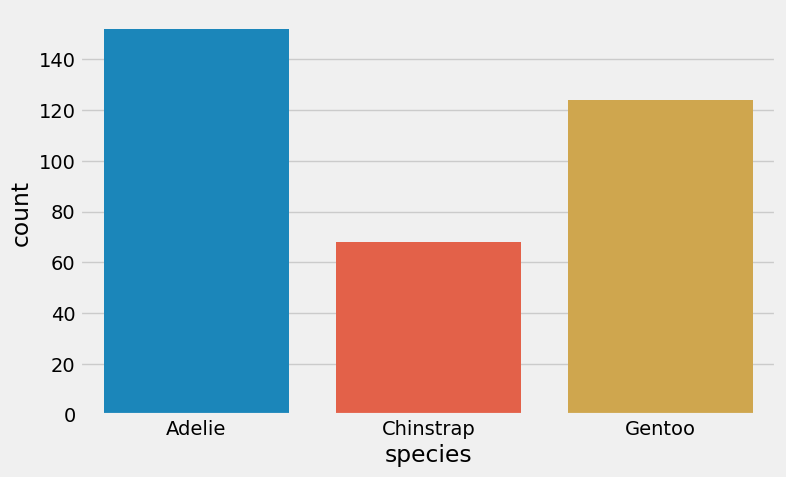

In [ ]:
# Generate barplot visualization of data by species
bars = sns.countplot(x="species", data=dataset)

# Modify x-tick labels to reflect species breakdown
bars.set_xticklabels(encoders["species"].classes_)

#### 🔸 Visualize Dataset by Species by Sex

The flexibility and utility of a bar chart is that we can extend them very easily in order to produce more thorough analyses and visualizations.

In [ ]:
Ax1, Ax10 = [1, 2, 3, 4], [10, 20, 30, 40]

list(zip(Ax1, Ax10))

[(1, 10), (2, 20), (3, 30), (4, 40)]

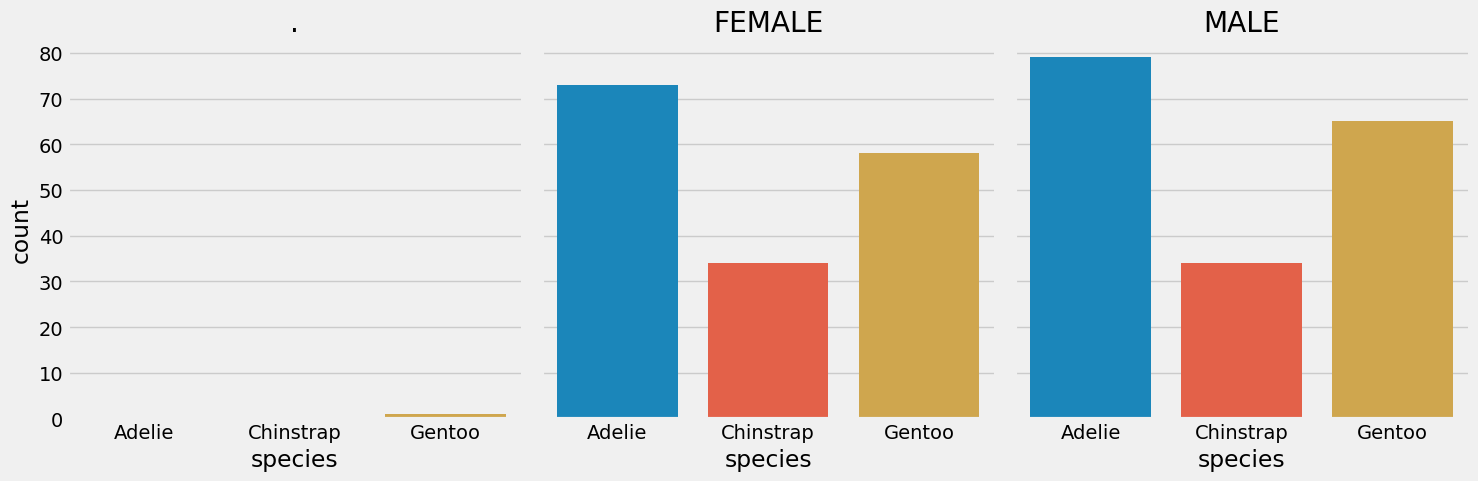

In [ ]:
# Generate stacked barplot visualizations of data by species by sex
catbars = sns.catplot(x="species", data=dataset, kind="count", col="sex")

# Modify x-tick labels to reflect species breakdown
catbars.set_xticklabels(encoders["species"].classes_)

# Modify subplot titles to reflect sex breakdown
for axis, title in zip(catbars.axes.flatten(), encoders["sex"].classes_):
  axis.set_title(title)

#### 🔸 Visualize Dataset by Feature-Dependent Scatterplots

Scatterplots are another very useful means of visualizing data; this time, rather than assessing their proportional independences, we want to examine how related individual data points are to one another and if there are generally detectable trends.

<Figure size 1200x600 with 0 Axes>

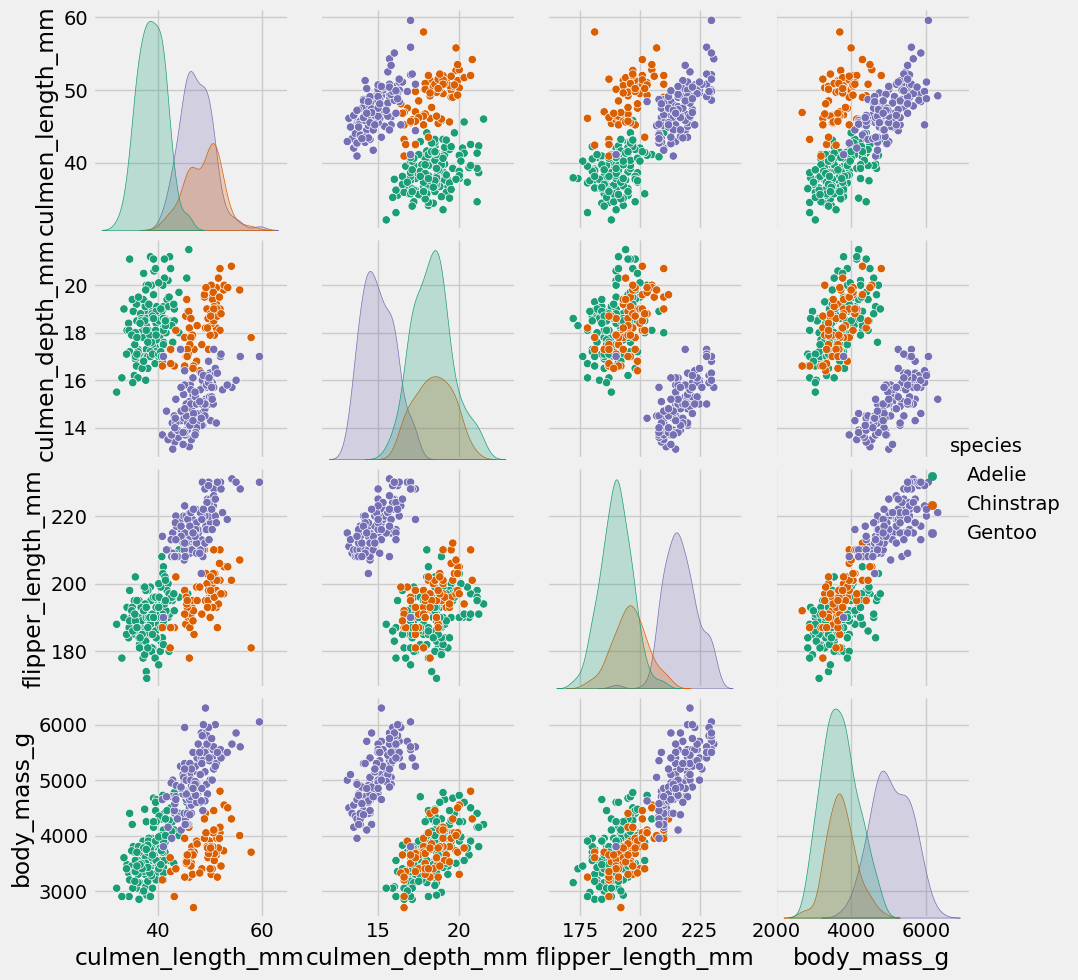

In [ ]:
# Initialize plotting boundaries for larger scatterplots
plt.figure(figsize=(12, 6))

# Generate gridded scatterplot visualizations of numerical features by species
scatters = sns.pairplot(data=dataset.drop([feature for feature in FEATURES_CATEGORICAL if feature != "species"],
                                     axis=1),
                        hue="species",
                        palette="Dark2")

# Modify subplot legend labels to reflect species breakdown
for axis, label in zip(scatters._legend.texts, encoders["species"].classes_):
  axis.set_text(label)

#### 🔸 Produce Correlation Matrix Across Numerical Data

Another very useful visualization is something called a correlational matrix/heatmap, which will become exponentially more important in future courses.

This visualization effectively tells us how each column/feature across our dataset are directly related to one another - the higher the magnitude of the correlational value, the more implicitly both features are related.

Text(0.5, 1.0, 'Correlation Matrix')

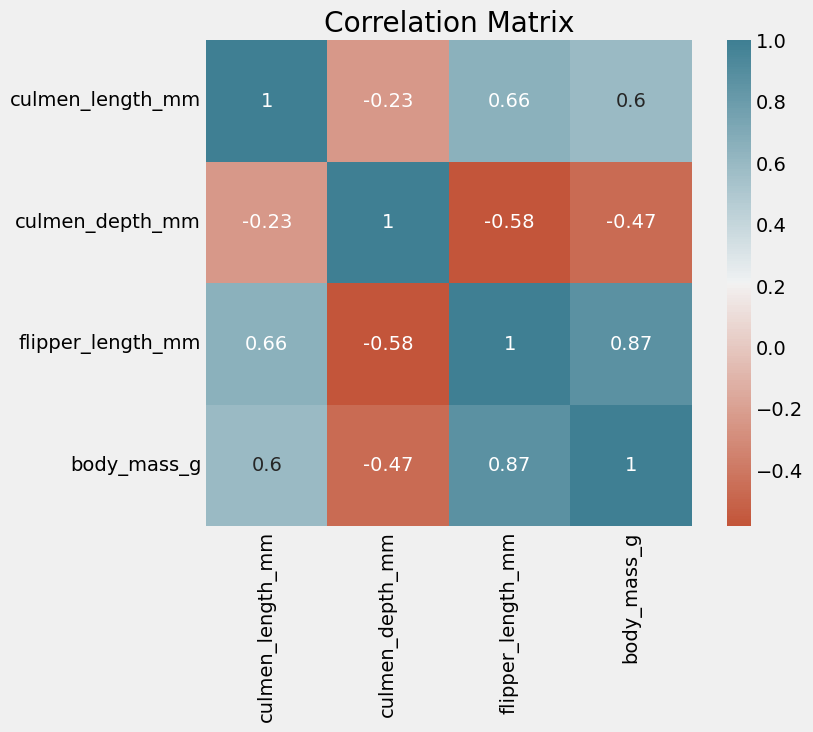

In [ ]:
# Initialize plotting boundaries for larger matrixes
plt.figure(figsize=(8, 6))

# Generate quantitative heatmap to visualize correlations across data
sns.heatmap(dataset.drop(FEATURES_CATEGORICAL, axis=1).corr(),
            annot=True,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True)

# Set title for correlation matrix
plt.title("Correlation Matrix")

#### 🔸 Create Descriptive Boxplot to Visualize Measures of Spread and Central Tendency

Boxplots (also called box-and-whiskers plots) can also be leveraged to assess the distribution of data across a dataset.

These are surprisingly complex graphical utilities, as they reveal much more information than expected.

<Axes: >

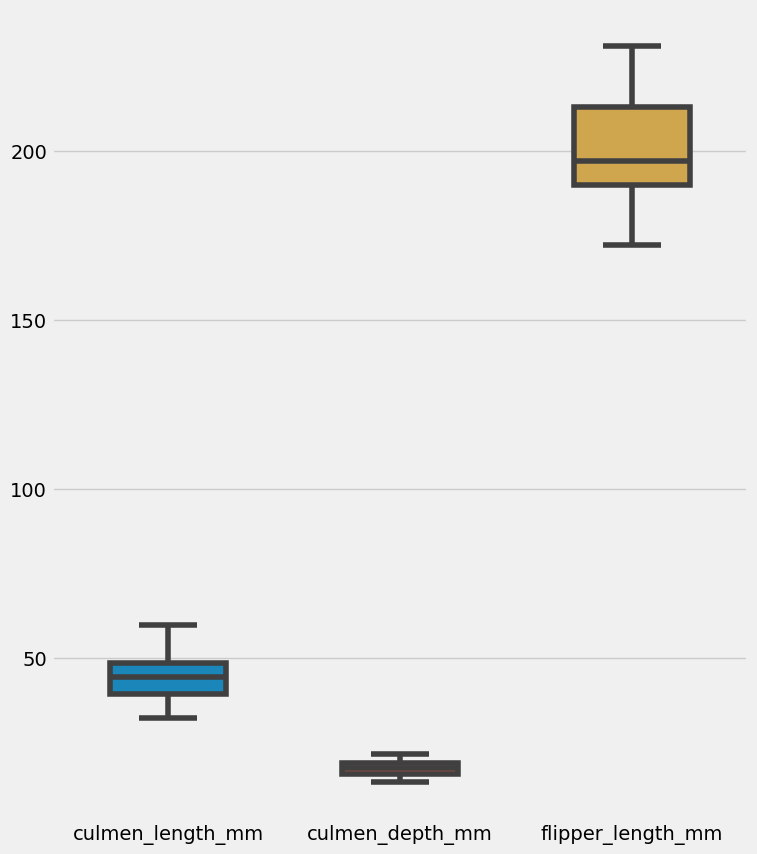

In [ ]:
# Initialize plotting boundaries for box-and-whiskers plots
plt.figure(figsize=(8, 10))

# Generate descriptive boxplot for identifying spread across quantitative features
sns.boxplot(data=dataset.drop(FEATURES_CATEGORICAL + ["body_mass_g"], axis=1),
            width=0.5, fliersize=5)

#### 🔸 Create Violin Plots to Break Down Numerical Distributions

A close cousin to boxplots are violin plots, which can be utilized to further visualize data distributions more intuitively.

[Text(0, 0, 'Adelie'), Text(1, 0, 'Chinstrap'), Text(2, 0, 'Gentoo')]

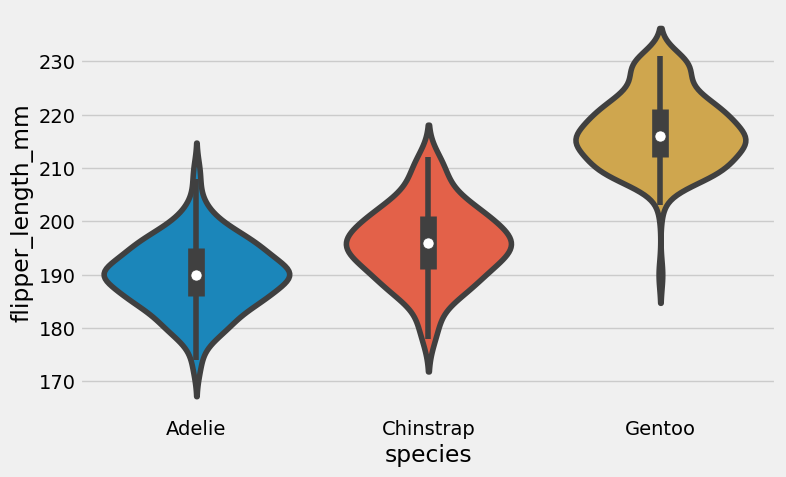

In [ ]:
# Generate violin plot to visualize distributions across species
violin = sns.violinplot(x="species", y="flipper_length_mm",
                        data=dataset, size=8)

# Modify x-tick labels to reflect species breakdown
violin.set_xticklabels(encoders["species"].classes_)

#### 🔸 Generate Kernel Density Estimate Plot to Generalize Data into a Histogram-Like Distribution

Finally, density plots can show data distributions at a whole new level by independently evaluating and showcasing each class's distributions separately in the same plot.

This can be very useful in understanding the nature of different classes' implicit relationships.

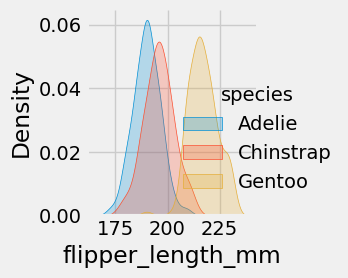

In [ ]:
# Create probability density distributions of flipper-length-dependent data
kdes = sns.FacetGrid(dataset,
                     hue="species").map(sns.kdeplot,
                                  "flipper_length_mm",
                                  shade=True).add_legend()

# Modify subplot legend labels to reflect species breakdown
for axis, label in zip(kdes._legend.texts, encoders["species"].classes_):
  axis.set_text(label)

---

### 🔹 A Final (And Very Helpful) EDA Utility

One incredibly useful tool for basic data processing, exploration, visualization, and analysis is the `pandas_profiling` tool, which can expeditiously evaluate several of the past several seminars' worth of metrics and tools.

This tool will be discouraged in this course for usage on homework challenges and projects, but will be encouraged for personal use and a means to validate your work within data science.

In [ ]:
# Importations for Exploratory Data Analysis Profiling
!pip3 install pandas_profiling --upgrade
import pandas_profiling as ppr

# Obtain Exploratory Profiling Report to Analyze Current Data
ppr.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
---

## 💠 **PART THREE**: Homework/Discussion 💠

### 📌 **REQUIRED CHALLENGES** 📌

> Pick a dataset from the following list and perform a basic EDA, ensuring that you stick to the generalized structure of the data design process.
>
> Basic datasets to explore:
> - **[World Happiness Report, 2012-2017](https://www.kaggle.com/unsdsn/world-happiness)**
> - **[Kepler Exoplanet Data, 2009-2017](https://www.kaggle.com/nasa/kepler-exoplanet-search-results)**
> - **[Netflix Movies & Shows, 2007-2021](https://www.kaggle.com/shivamb/netflix-shows)**
>
> Intermediate datasets to explore:
> - **[Avengers Survivability Data](https://github.com/fivethirtyeight/data/tree/master/avengers)**
> - **[Drug Use By Age](https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age)**
> - **[Data on Why Many Americans Don't Vote](https://github.com/fivethirtyeight/data/tree/master/non-voters)**
>
> **NOTE**: _Exploring an intermediate dataset is more challenging and riskier in terms of achieving successful EDA completion, but there is potential for bonus credit based on how well you're able to analyze the data._
>
> **NOTE**: _This should be in a **COPY OF THIS NOTEBOOK** or a **SEPARATE NOTEBOOK**._

---

After getting access to a dataset:
  1. Ask interesting critical questions.
  2. Explore, clean, curate, and process your data.
  3. Analyze your data to answer your current question(s).
  4. Visualize your findings to further interpret your analysis.
  5. REPEAT!

**NOTE**: _Using_ `pandas_profiling` _or a similar EDA tool is **not allowable** to showcase your results - you must develop your exploratory analyses/visualizations from scratch! (However, you are allowed to profile your data to check whether or analyses/visualizations are accurate.)_

---
---
---